In [1]:
import matplotlib.pyplot as plt
import numpy as np

def read_waveforms(LA, RV, RA) :
    infile = open('waveforms.csv', 'r')

    line = infile.readline()
    wf = 0 # which waveform are we trying to read (0 = LA, 1 = RV, 2 = RA)

    while line :
        line = line.strip()
        data = line.split(',')

        for i in range(0, len(data)) : 
            data[i] = float(data[i])

        if(wf == 0) :
            LA.append(data)
        elif(wf == 1) :
            RV.append(data)
        elif(wf == 2) :
            RA.append(data)
        
        wf = (wf + 1) % 3
        line = infile.readline()

    infile.close()

def read_times(TL, TR) :
    infile = open('times.csv', 'r')
    line = infile.readline()
    data = line.strip().split(',')

    for i in range(0, len(data)) : 
        data[i] = float(data[i]) * 1000

    TL.append(data)

    line = infile.readline()
    data = line.strip().split(',')

    for i in range(0, len(data)) : 
        data[i] = float(data[i]) * 1000

    TR.append(data)
    infile.close()

def plot_waveforms(LA, RV, RA, TL, TR) :
    print('create your individual waveform plots here')

# make empty data and time Lists
LA_list = []
RV_list = []
RA_list = []
TL_list = []
TR_list = []

read_waveforms(LA_list, RV_list, RA_list)
read_times(TL_list, TR_list)

# convert all data and time lists to numpy arrays for plotting
LA = np.array(LA_list)
RV = np.array(RV_list)
RA = np.array(RA_list)
TL = np.array(TL_list[0])
TR = np.array(TR_list[0])



In [2]:
num_instances = len(LA)
for i in range(0, num_instances) :
    plt.subplot( 311 )
    plt.plot(TL, LA[7, :])
    plt.title('Linear Acceleration of Instance 8')
    plt.ylabel('Lin Accel (g)')
    plt.xticks(np.arange(0, 55, step=5))
    
    plt.subplot( 312 )
    plt.plot(TR, RV[7, :])
    plt.ylabel('Rot Vel(rad/sec) ')
    plt.xticks(np.arange(0, 55, step=5))

    plt.subplot( 313 )
    plt.plot(TR, RA[7, :])
    plt.xlabel('Time (ms)')
    plt.ylabel('Rot Accel(rad/sec^2) ')
    plt.xticks(np.arange(0, 55, step=5))

    plt.savefig('Instance ' + str(i + 1) + '.png')
    plt.close()


In [3]:
MLA = []
ALA = []
PLA = []

MRV = []
ARV = []
PRV = []

MRA = []
ARA = []
PRA = []
    
for i in range(0,len(LA)):
    MLA_l = np.min(LA[i])
    MLA.append(MLA_l)
    
    MRV_l = np.min(RV[i])
    MRV.append(MRV_l)
    
    MRA_l = np.min(RA[i])
    MRA.append(MRA_l)
    
    ALA_l = np.mean(LA[i])
    ALA.append(ALA_l)
    
    ARA_l = np.mean(RA[i])
    ARA.append(ARA_l)
    
    ARV_l = np.mean(RV[i])
    ARV.append(ARV_l)
    
    PLA_l = np.max(LA[i])
    PLA.append(PLA_l)
    
    PRV_l = np.max(RV[i])
    PRV.append(PRV_l)
    
    PRA_l = np.max(RA[i])
    PRA.append(PRA_l)

In [4]:
plt.plot(ARA)
plt.xlabel('Time (ms)')
plt.ylabel('Rot Accel(rad/sec^2) ')
plt.xticks(np.arange(0, 55, step=5))
plt.savefig('Instance ARA.png')
plt.close()


In [5]:
plt.plot(PLA)
plt.xlabel('Time (ms)')
plt.ylabel('Peak Lin Accel(g) ')
plt.xticks(np.arange(0, 55, step=5))
plt.savefig('Instance PLA.png')
plt.close()

In [6]:
plt.plot(PRA)
plt.xlabel('Time (ms)')
plt.ylabel('Peak Rot Accel(rad/sec^2) ')
plt.xticks(np.arange(0, 55, step=5))
plt.savefig('Instance PRA.png')
plt.close()

In [7]:
plt.plot(PRV)
plt.xlabel('Time (ms)')
plt.ylabel('Peak Rot Vel(rad/sec) ')
plt.xticks(np.arange(0, 55, step=5))
plt.savefig('Instance PRV.png')
plt.close()

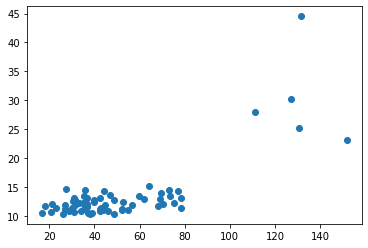

In [8]:
plt.scatter(PLA, PRA)
plt.show()

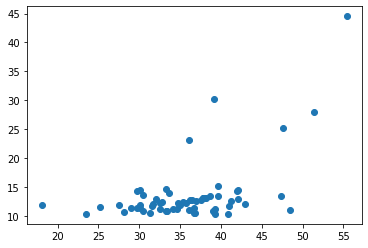

In [9]:
plt.scatter(PRV, PRA)
plt.show()

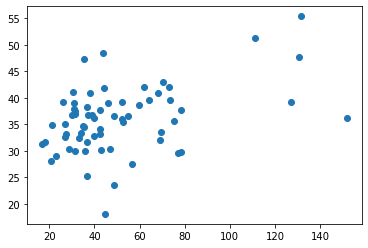

In [10]:
plt.scatter(PLA, PRV)
plt.show()

In [32]:
sorted_index_array = np.argsort(PLA) 

  

[ 6.0754   6.8808   7.6102   7.6971   8.1978   8.9717  10.7922  12.5103
 14.7845  19.3798  24.1574  31.4799  35.773   39.4579  42.916   50.3714
 52.5665  52.4645  45.1328  29.6273  23.4105  22.1923  23.7915  25.8328
 28.8191  32.0325  29.4953  29.7482  25.2206  22.8782  20.445   18.8563
 12.9596  11.2953  10.3239  10.3107   8.2618   6.7277   4.4884   2.1038
  0.9767   0.54941  0.51873  1.2056   1.8818   2.768    3.5359   2.9988
  2.3043   1.8205   2.1338   2.1783   2.5295   3.1434   3.333    3.4354
  3.528    3.3813   4.2649   4.27     4.7181   4.069    2.5396   1.792
  2.0038   3.3847   2.6135   3.3993   3.4204   3.6954   2.9472   2.0193
  0.64138  0.17289  0.       1.2287   1.039    1.4169   2.0462   1.7491 ]
